<a href="https://colab.research.google.com/github/avinashpatni000/airbnb-capstone-projects/blob/main/Avinash_Patni's_Notebook__Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Importing Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr
%matplotlib inline


**# Data Loading into a dataset**

In [ ]:
import pandas as pd

In [ ]:
airbnb=pd.read_csv('airbnb.csv')

# **Print the Head of the dataset**

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


# **Print the Shape of the dataset**

**Now we need to check how many rows and columns the dataset is having. It is also necessary to check how many unique values are present for each column. For this we will also use the nunique.**

**So we have the 48895 rows and 16 columns.** 

In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# **Plotting the dataset in a map**

**Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail. I have used the zoom start to 9 so that the clusters can be visible.**





In [ ]:
Long=-73.80
Lat=40.80
locations = list(zip(airbnb.latitude, airbnb.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

# **Print the Datatypes of the dataset**

In [ ]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Removing the Duplicates data**

In [ ]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)


##**Check for the null values in each column**

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Drop unnecessary columns**

In [ ]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

# **Examining Changes**

In [ ]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# **Remove the NaN values from the dataset**

In [ ]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38843 non-null  int64  
 1   neighbourhood_group             38843 non-null  object 
 2   neighbourhood                   38843 non-null  object 
 3   latitude                        38843 non-null  float64
 4   longitude                       38843 non-null  float64
 5   room_type                       38843 non-null  object 
 6   price                           38843 non-null  int64  
 7   minimum_nights                  38843 non-null  int64  
 8   number_of_reviews               38843 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  38843 non-null  int64  
 11  availability_365                38843 non-null  int64  
dtypes: float64(3), int64(6), object(

# **For Nan Values in column reviews_per_month,replacing Nan with 0**

In [ ]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

# **Price Exploration**#
We will check if there is any null value presentin the price column and from the below, it looks like we don't have any null value to take care of.

In [ ]:
airbnb.price.isna().sum()

0

# **Examine Continous Variables**

In [ ]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Print all the columns names**

In [ ]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# **Get Correlation between different variables**

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

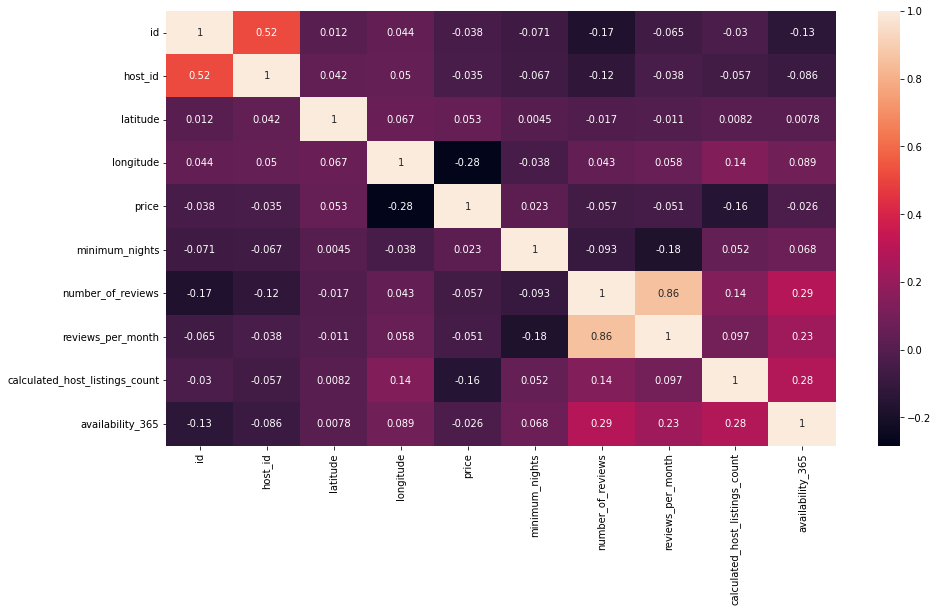

In [ ]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [ ]:
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.515958,0.012236,0.044468,-0.038491,-0.070828,-0.174003,-0.064902,-0.030148,-0.129185
host_id,0.515958,1.000000,0.041541,0.050500,-0.034623,-0.067034,-0.120188,-0.037729,-0.056517,-0.086013
latitude,0.012236,0.041541,1.000000,0.067184,0.052932,0.004471,-0.017026,-0.010961,0.008201,0.007759
longitude,0.044468,0.050500,0.067184,1.000000,-0.283410,-0.038118,0.042802,0.057838,0.135849,0.089336
price,-0.038491,-0.034623,0.052932,-0.283410,1.000000,0.023057,-0.056695,-0.051355,-0.156468,-0.025687
minimum_nights,-0.070828,-0.067034,0.004471,-0.038118,0.023057,1.000000,-0.093219,-0.181727,0.051613,0.068368
number_of_reviews,-0.174003,-0.120188,-0.017026,0.042802,-0.056695,-0.093219,1.000000,0.856317,0.142405,0.290974
reviews_per_month,-0.064902,-0.037729,-0.010961,0.057838,-0.051355,-0.181727,0.856317,1.000000,0.097140,0.225924
calculated_host_listings_count,-0.030148,-0.056517,0.008201,0.135849,-0.156468,0.051613,0.142405,0.097140,1.000000,0.279918
availability_365,-0.129185,-0.086013,0.007759,0.089336,-0.025687,0.068368,0.290974,0.225924,0.279918,1.000000


Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

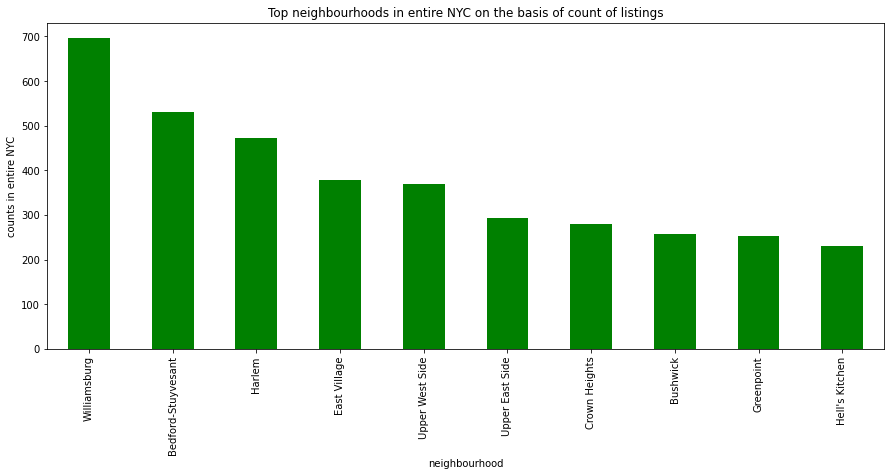

In [ ]:
top_10_neighbours = airbnb['neighbourhood'].value_counts()[:10]
top_10_neighbours.plot(kind='bar',color='g')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

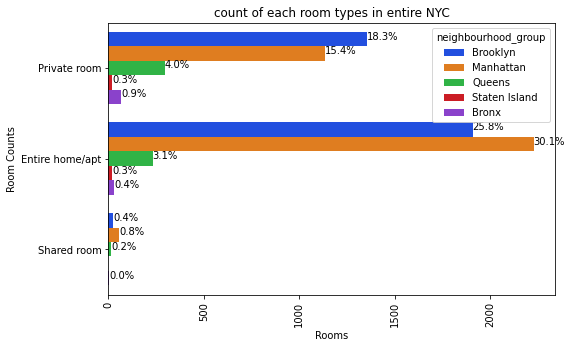

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=airbnb,palette='bright')

total = len(airbnb['room_type'])
for bar in ax.patches:
  percentage = '{:.1f}%'.format(100*bar.get_width()/total)
  x = bar.get_x() + bar.get_width() + 0.02
  y = bar.get_y() + bar.get_height()/2
  ax.annotate(percentage, (x,y))
              # ha = 'center', va = 'center',
              # xytext = (0, 9),
              # textcoords = 'offset points')

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

**Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.**

**Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.**

**Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.**

**We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


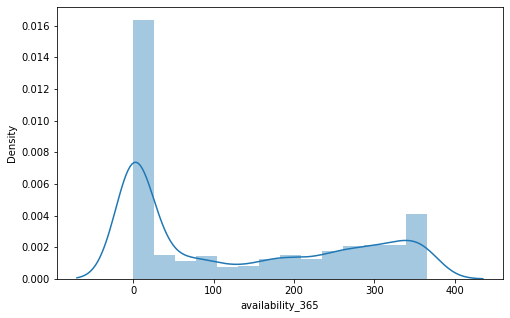

In [ ]:
#distribution of listings availability at NYC!
sns.distplot(airbnb['availability_365'])

**availability_365 have uniform distribution with availability ranging from 0 to 370**

**The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)**

**Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:**

In [ ]:
airbnb.shape

(29203, 12)

In [ ]:
airbnb.head(6)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787.0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845.0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632.0,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365.0
3,4869.0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192.0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0
5,7322.0,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0


# **Data Visualization**

In [ ]:
import seaborn as sns

# **Unique Values**
**Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail. I have used the zoom start to 9 so that the clusters can be visible.**

In [ ]:
print('Unique value for room_type are :',airbnb.room_type.unique())
print('Unique value for neighbourhood_group are :',airbnb.neighbourhood_group.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room']
Unique value for neighbourhood_group are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


# **Plot all Neighbourhood Group**

Text(0.5, 1.0, 'Neighbourhood Group')

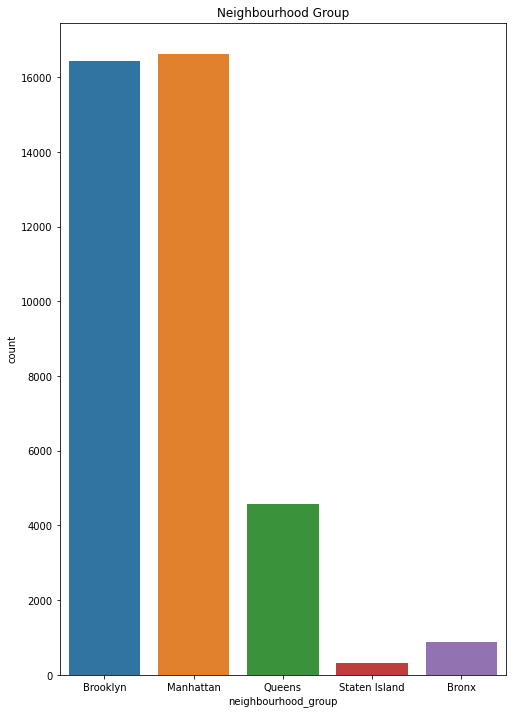

In [ ]:
sns.countplot(airbnb['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(8,12)
plt.title('Neighbourhood Group')

# **Plot Neighbourhood**`

Text(0.5, 1.0, 'Neighbourhood')

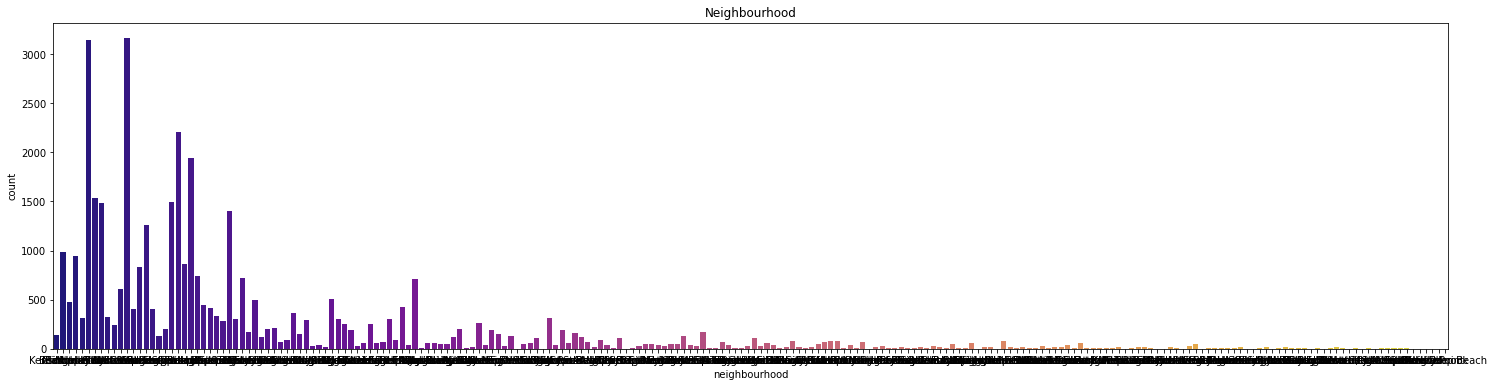

In [ ]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

# **Ploting Room Types**

# **Room Types and Neighbourhood Group**
**We will first check the distribution of the room type by grouping the data. From the below its clear the Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less, we will still try to uncover as much details as we can.**

Text(0.5, 1.0, 'Restaurants delivering online or Not')

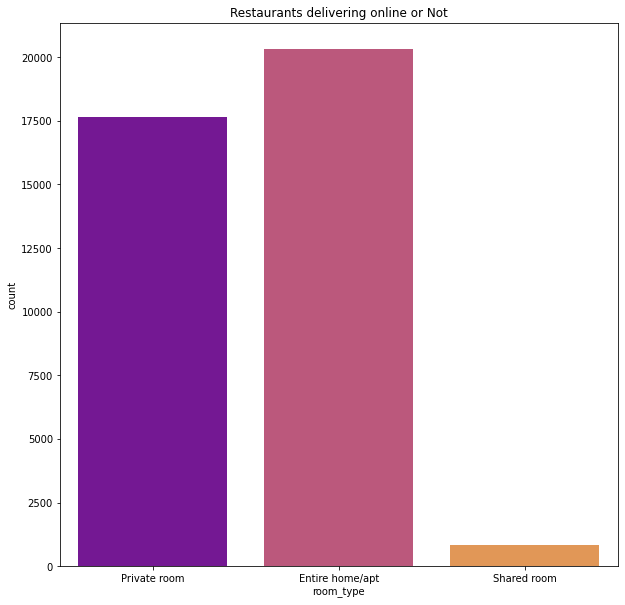

In [ ]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

#**Top 10 Apartment listings**#
**Below i am displaying the Entire Home/Apartment renting and it looks odd that Sonder(NYC) have itself is too high. We will also list out only the details for the user if they are genuine hotels or there is any discrepancy in the data. We will use the latitude and longitude of the data to find out.**

In [ ]:
apt = airbnb[airbnb['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20211,219517861,Sonder (NYC),Financial District,Manhattan,210
6449,7503643,Vida,Greenpoint,Brooklyn,52
8430,12243051,Sonder,Financial District,Manhattan,51
20214,219517861,Sonder (NYC),Murray Hill,Manhattan,50
19900,205031545,Red Awning,Midtown,Manhattan,49
17832,120762452,Stanley,Murray Hill,Manhattan,49
12273,30283594,Kara,Hell's Kitchen,Manhattan,41
17451,107434423,Blueground,Chelsea,Manhattan,37
12275,30283594,Kara,Midtown,Manhattan,33
17628,113805886,Yaacov,Upper East Side,Manhattan,33


#**Top 10 Private room**#
**We will do it for both Private room and Shared room and also will check for the top hoteliers if it is the same location or it is spread out.**

In [ ]:
private = airbnb[airbnb['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)


,host_id,host_name,neighbourhood,private
15261,190921808,John,Hell's Kitchen,44
14025,137358866,Kazuya,Woodside,35
16301,238321374,Eyal,Upper West Side,32
15984,224414117,Gabriel,Hell's Kitchen,30
16035,226410657,Nina,Bedford-Stuyvesant,26
16144,230192510,Zach,Fort Greene,25
16386,242962235,Yuval,Ridgewood,23
16539,252604696,Erin,Chelsea,20
15761,216235179,Nina,Bushwick,17
14024,137358866,Kazuya,Sunnyside,17


In [ ]:

airbnb['minimum_nights'].describe()

count    7390.000000
mean        8.530717
std        29.761734
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max      1250.000000
Name: minimum_nights, dtype: float64

# **Relation between neighbourgroup and Availability of Room**

Text(0.5, 1.0, 'Neighbourhood with higher no of the Hosts')

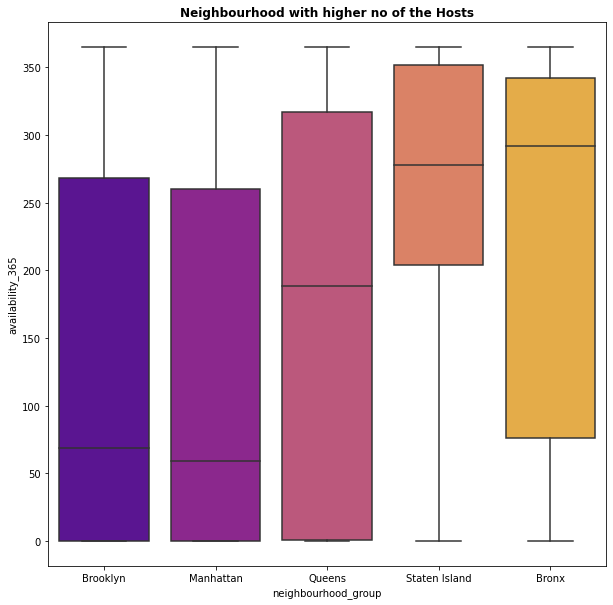

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.title('Neighbourhood with higher no of the Hosts', weight='bold')

### **Bronx has the higher no of hosts compare to other neighbourhoods but also the cheapest price rates.**

# **Analysing Neighbourhood traffic based on their price and recervation count**

Text(0, 0.5, 'Price')

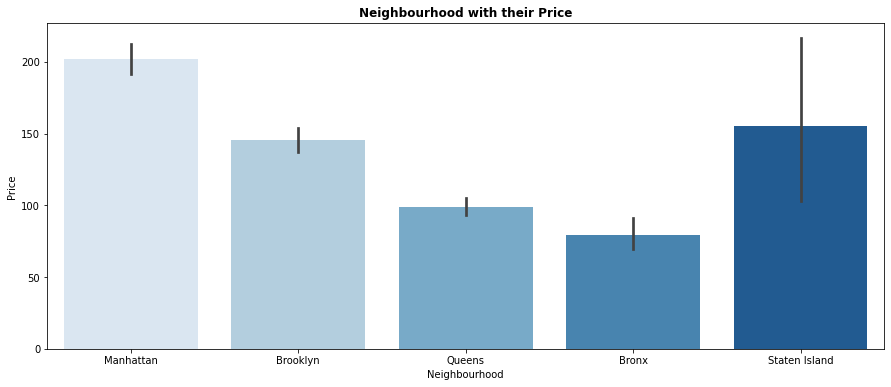

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plot = sns.barplot(x='neighbourhood_group',y='price', data=airbnb,order=pd.value_counts(airbnb['neighbourhood_group']).iloc[:].index,palette= 'Blues')

plt.title('Neighbourhood with their Price', weight='bold')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')

**The unequaled Empire State Building, the Rockefeller Center, the surprising Chrysler Building, the fascinating Times Square, the controversial MoMA,etc the top attractions in NYC loacted in Manhattan. With only Times Square having over 39 million visitors annually.**
**This makes Manhattan as the most expensive and frequently booked neighbourhood in NYC.**
**Bronx is the most cheapest state**

###**Manhattan is the most expensive place compare to other with higher no of reservations. Following Brooklyn, Staten Island, Queens Neighbourhood, Bronx.**

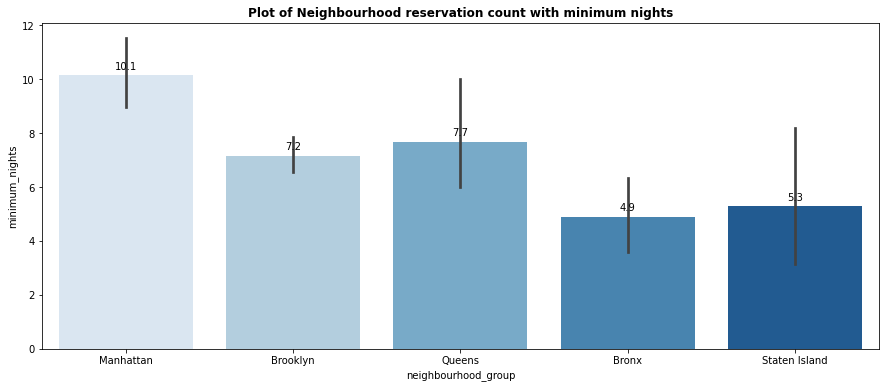

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plot = sns.barplot(x='neighbourhood_group',y='minimum_nights', data=airbnb,order=pd.value_counts(airbnb['neighbourhood_group']).iloc[:].index,palette= 'Blues')
plt.title('Plot of Neighbourhood reservation count with minimum nights', weight='bold')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### **Guest are seemed to have a longer stay at Manhattan, Brooklyn and Queens compared to other neighbourhoods.**

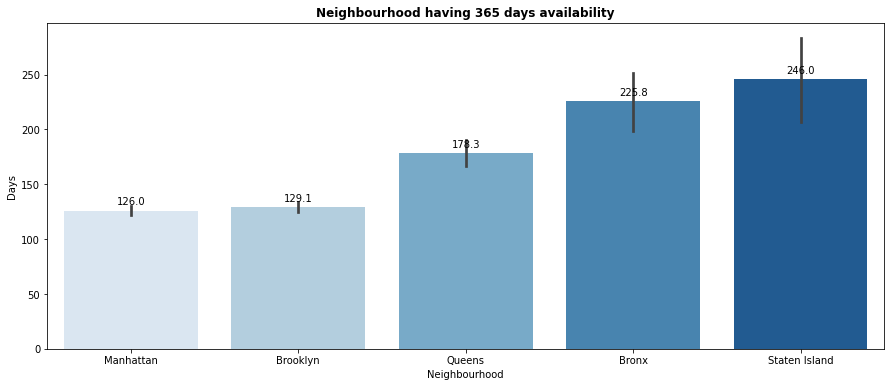

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plot = sns.barplot(x='neighbourhood_group',y='availability_365', data=airbnb,order=pd.value_counts(airbnb['neighbourhood_group']).iloc[:].index,palette= 'Blues')

plt.title('Neighbourhood having 365 days availability', weight='bold')
plt.xlabel('Neighbourhood')
plt.ylabel('Days')


for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### **Hotels in Staten Islands are available for higher no of days then other neighbourhood groups. Brooklyn and Manhathan despite being the top 2 Highly expensive Neighbourhood groups seems to have lesser number of availability days.**

# ***Map of Neighbourhood group***

**Scatter Plot to show the neighbourhood group based on Latitude and Longitude**

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.

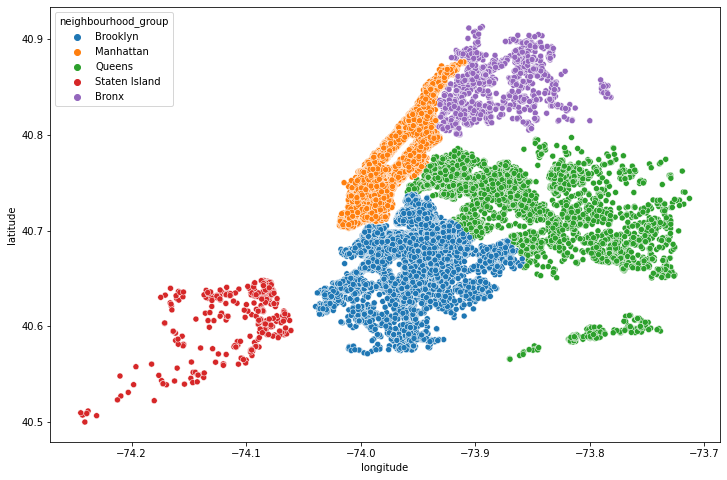

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

# **Map of Neighbourhood**

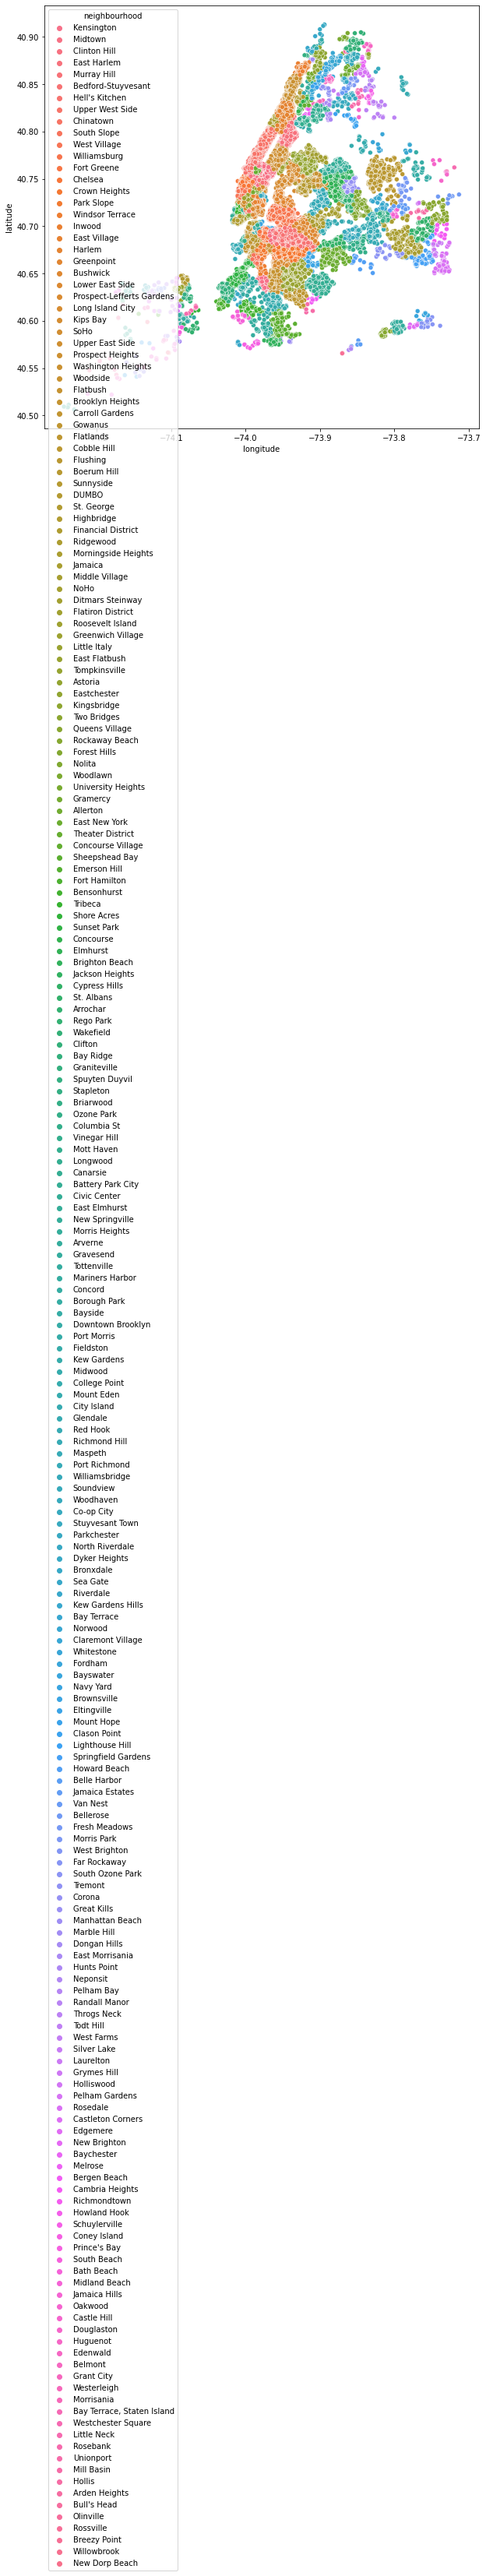

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

# **Maps of Room Types**

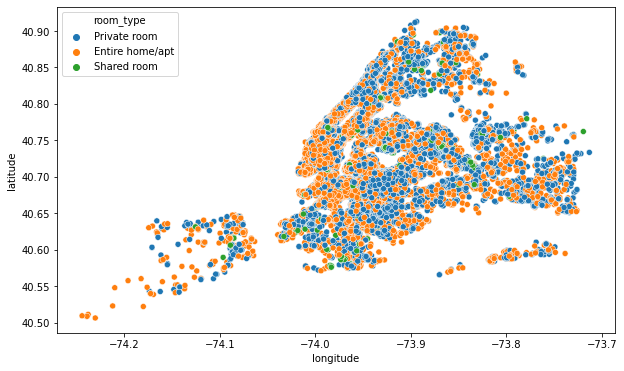

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

# **Availability of Room**

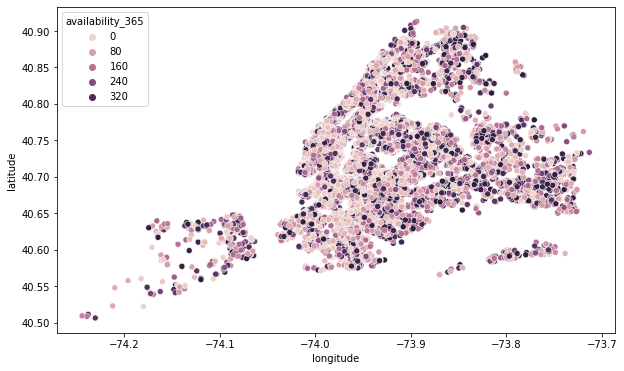

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

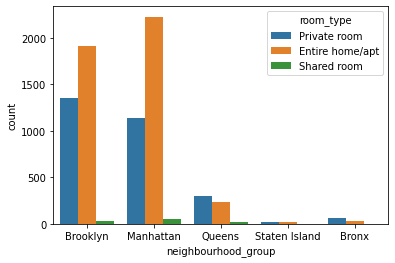

In [ ]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb)

# **Plotting the dataset in a map**
**Map Of New York City**

---



---



**Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail. I have used the zoom start to 9 so that the clusters can be visible.**

In [ ]:


import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=9)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

# **Finally the conclusion. What do we know, what have we learnt, and** 
#**what have we concluded**



*   **Well at first we can say that Manhattan is the costliest place to live and Brooklyn and Bronx being the cheapest to live.**
*   **People mostly prefer Entire Room/apartment room type for their stay and renting out and they spend more nights there compared to other room types.**
*   **Higher the number of reviews for a particular neighbourhood group, higher the people there which ultimately means that, that place is a tourist place.**
*   **People have mostly chosen rooms with less prices which is obvious but in relative comparision not many people have booked places with expensive rates.**
*   **People staying not for more than one night in any neighbourhood group and room type that tells us something about those type of people that they are travellers and they are there for just a night stay.**
*   **The listings which were way cheaper than the other neighbourhood group listings were available for much more duration in terms of days than the listings who had higher prices, the higher pricing listings were only available for till the mid of the year.**








# **Here we end our analysis. Thank you for reading it till here :)**